In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
performances = pd.read_csv("output/tidy/performances.csv", parse_dates=["start", "end"], infer_datetime_format=True, index_col="start").sort_index()
performances["modification_base_value"] = performances["total_element_score"] - performances["total_base_value"]

ecole_de_glace = [
  "Saskia ERNY",
  "Eva CASTELLANOS",
  "Mia HERVE",
  "Naissa SIMON-GUERIN",
  "Paloma LE SAINT HUBY",
  "Rose CABIROL",
  "Yohan SANTOS",
  "Lilian BROQUA",
  "Nell ERNY",
  "Izia ERNY",
  "Angelika ARKHIPOV",
]
competiteurs_avances = [
  "Alexandrine CALBO",
  "Clemence VIALA",
  "Hugo GUILLOTEAU",
  "Syrine PITIE",
  "Shaims PITIE",
  "Themis REY",
  "Samantha SANDOVAL. ROUGON",
  "Maelys TARZAALI"

]
competiteurs_club = [
  "Yaelle BOUQUIER",
  "Adele BOUQUIER",
  "Elise PASTEUR",
  "Chloe BRAS",
  "Sophie VIGNOLE",
  "Julie GONZALES",
  "Sofia AIT-OUBBA",
  "Tamara LATRASSE",
  "Mathys BUE-HUBERT",
  "Laura PASCUAL",
  "Elise DRUNOT",
  "Eva FLOREK",
  "Celia KIBITI",
  "Victoria LLEDOS",
  "Amandine CATUSSE",
  "Marion VIALA",
  "Alyson CALMELS",
  "Besma BOUSSOUALIN",
]

In [134]:
performances[performances.name=="Yaelle BOUQUIER"]


,performance_id,city,competition,end,type,program,name,nation,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_base_value,unfactored_components,avg_unfactored_components,total_deductions,modification_base_value
start,,,,,,,,,,,,,,,,,,
2021-12-11,02f4eae2a0,Toulouse,Trophée de Noël,2021-12-12,TF,CAT A BENJAMIN FILLES FREE SKATING,Yaelle BOUQUIER,FRA,1,1,9.57,8.63,10.50,8.60,10.50,2.625,0.0,0.03
2022-02-05,1fedb6444f,Castres,Trophée de Castres,2022-02-06,Regional,REGIONAL A POUSSIN/BINJAMIN DAMES FREE SKATING,Yaelle BOUQUIER,FRA,2,3,9.70,9.82,9.58,9.93,9.58,2.395,0.0,-0.11
2022-02-19,ebdfb1fe5d,Toulouse,Coupe des Violettes,2022-02-20,SFC,CAT F2 BENJAMIN DAMES FREE SKATING,Yaelle BOUQUIER,FRA,4,2,17.05,7.05,10.00,7.81,4.00,2.000,0.0,-0.76
2022-03-12,79160f6de0,Nîmes,Coupe des Costières,2022-03-13,Regional,FEDERAL 2 BENJAMINES FILLES FREE SKATING,Yaelle BOUQUIER,FRA,5,6,19.58,6.22,13.36,7.13,5.34,2.670,0.0,-0.91


In [135]:
perfs_ecole_de_glace = {patineur:  performances[performances.name==patineur]for patineur in ecole_de_glace}
perfs_competiteurs_avances = {patineur: performances[performances.name==patineur] for patineur in competiteurs_avances}
perfs_competiteurs_club = {patineur: performances[performances.name==patineur] for patineur in competiteurs_club}
criteria = [
  {
    "column": "total_segment_score",
    "label": "Total Segment Score"
  }, 
  {
    "column": "total_element_score",
    "label": "Total Element Score"
  }, 
  {
    "column": "total_component_score",
    "label": "Total Component Score"
  }, 
  {
    "column": "unfactored_components",
    "label": "Total Components (Unfactored)"
  }, 
  {
    "column": "avg_unfactored_components",
    "label": "Moyenne Components (Unfactored)"
  }, 
  {
    "column": "total_base_value",
    "label": "Total Base Value"
  }, 
  {
    "column": "modification_base_value",
    "label": "Total GOE"
  }, 
]

In [136]:
width_fig = 15
height_subplot = 10

/var/folders/7s/7fbmr9xn5bbctssnp6j6sr1h0000gp/T/ipykernel_89892/3381065093.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


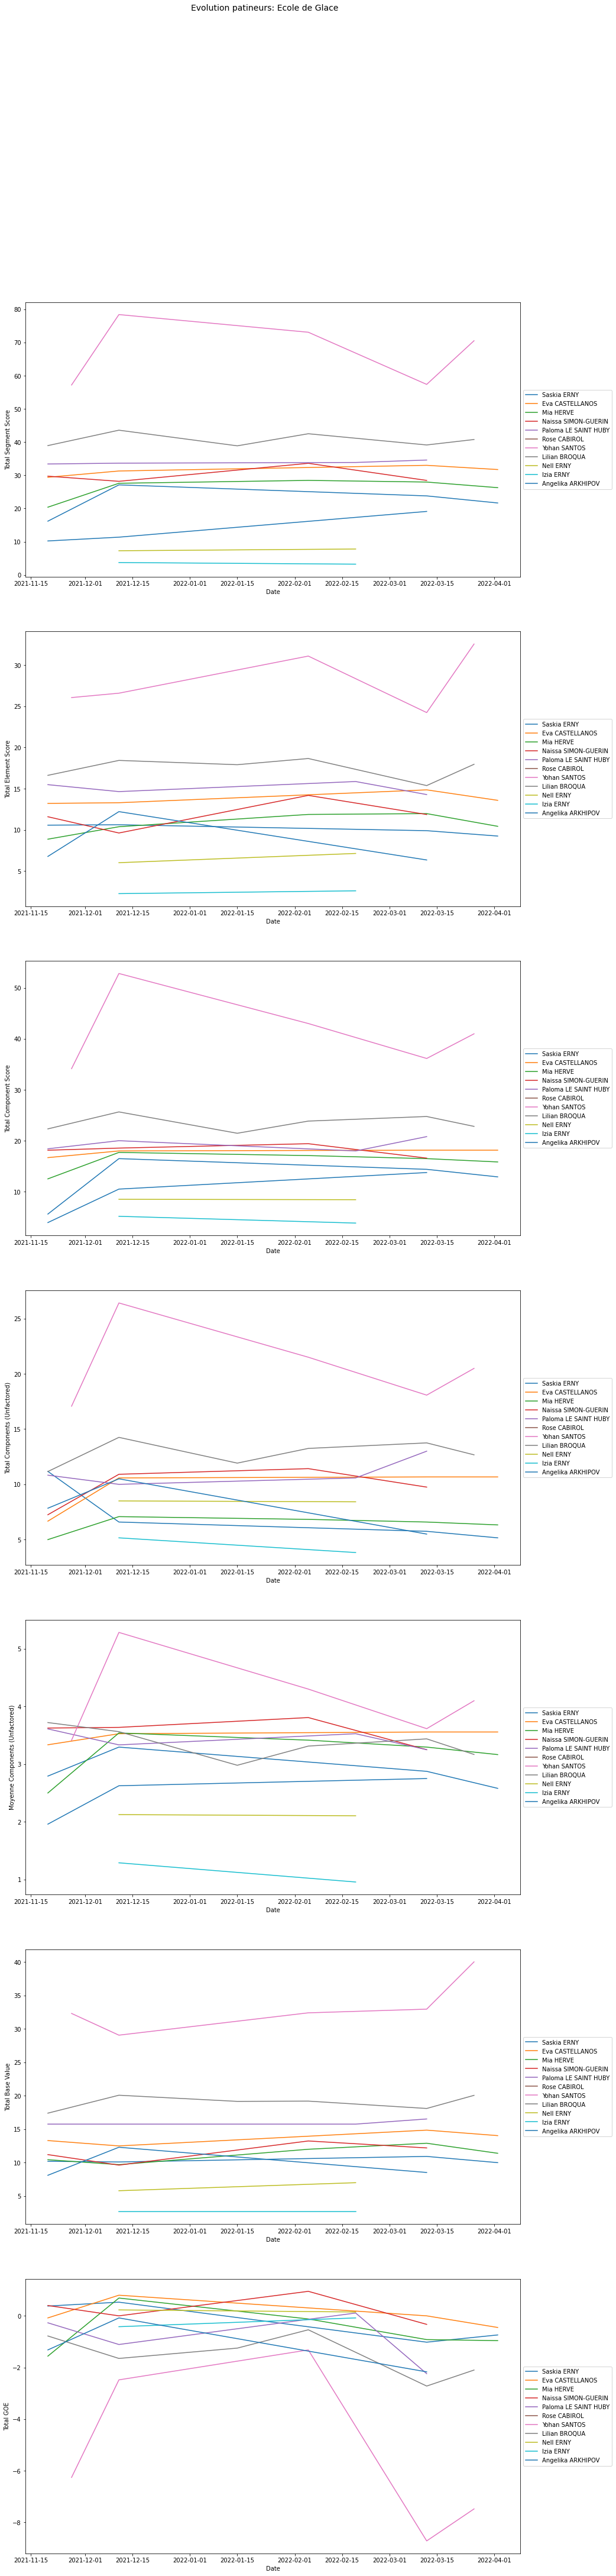

In [137]:
fig, axes = plt.subplots(len(criteria))
fig.set_size_inches(width_fig, height_subplot*len(criteria))
for index, crit in enumerate(criteria):
  for patineur, perfs in perfs_ecole_de_glace.items():
    axes[index].plot(perfs.index, perfs[crit["column"]], label=patineur)
  axes[index].set(ylabel=crit["label"], xlabel="Date")
  axes[index].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("Evolution patineurs: Ecole de Glace", fontsize=14)
fig.show()

/var/folders/7s/7fbmr9xn5bbctssnp6j6sr1h0000gp/T/ipykernel_89892/140222938.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


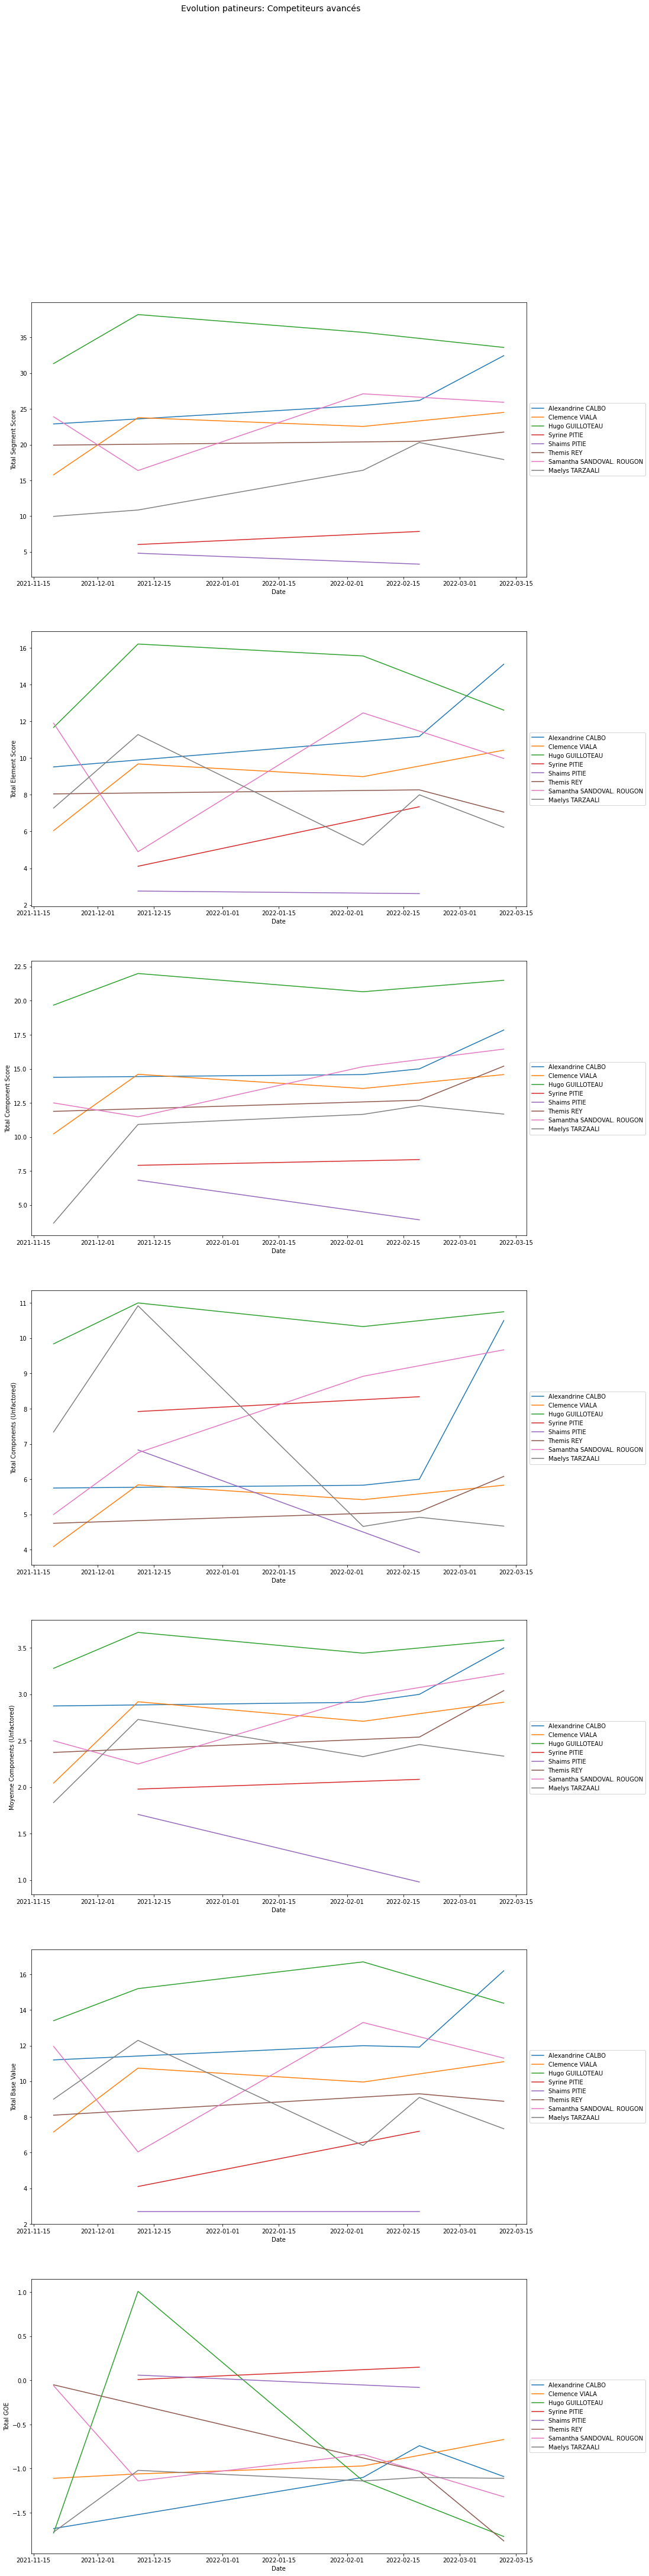

In [138]:
fig, axes = plt.subplots(len(criteria))
fig.set_size_inches(width_fig, height_subplot*len(criteria))
for index, crit in enumerate(criteria):
  for patineur, perfs in perfs_competiteurs_avances.items():
    axes[index].plot(perfs.index, perfs[crit["column"]], label=patineur)
  axes[index].set(ylabel=crit["label"], xlabel="Date")
  axes[index].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("Evolution patineurs: Competiteurs avancés", fontsize=14)
fig.show()

/var/folders/7s/7fbmr9xn5bbctssnp6j6sr1h0000gp/T/ipykernel_89892/4052542345.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


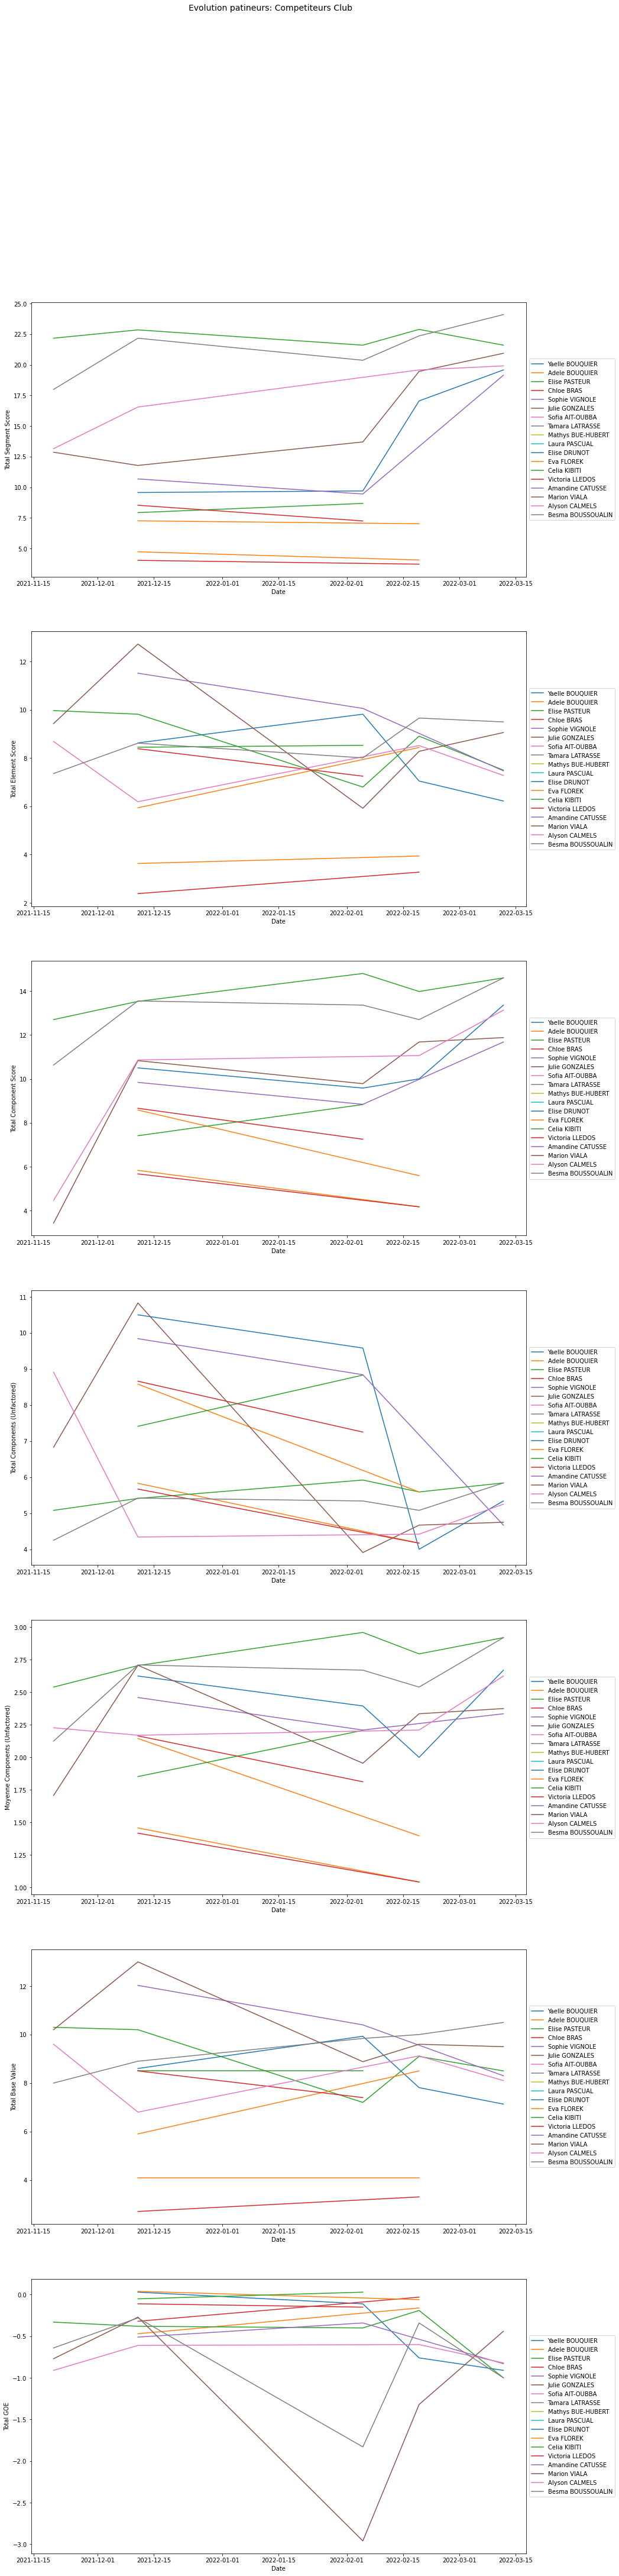

In [139]:
fig, axes = plt.subplots(len(criteria))
fig.set_size_inches(width_fig, height_subplot*len(criteria))
for index, crit in enumerate(criteria):
  for patineur, perfs in perfs_competiteurs_club.items():
    axes[index].plot(perfs.index, perfs[crit["column"]], label=patineur)
  axes[index].set(ylabel=crit["label"], xlabel="Date")
  axes[index].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("Evolution patineurs: Competiteurs Club", fontsize=14)
fig.show()